# Filtado de mensajes spam

## Descripción del problema real

La recepción de publicidad no deseada a traves mensajes de texto usando SMS (Short Message Service) es un problema que afecta a muchos usuarios de teléfonos móviles. El problema radica en que los usuarios deben pagar por los mesajes recibidos, y por este motivo resulta muy importante que las compañías prestadoras del servicio puedan filtrar mensajes indeseados antes de enviarlos a su destinatario final. Los mensajes tienen una longitud máxima de 160 caracteres, por lo que el texto resulta poco para realizar la clasificación, en comparación con textos más largos (como los emails). Adicionalmente, los errores de digitación dificultan el proceso de detección automática.

## Descripción del problema en términos de los datos

Se tiene una muestra contiene 5574 mensajes en inglés, no codificados y clasificados como legítimos (ham) o spam (http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/). La información está almacenada en el archivo `datos/spam-sms.zip`.El problema en términos de los datos consiste en clasificar si un mensaje SMS es legítico o spam, a partir del análisis de las palabras que contiente, partiendo del supuesto de que ciertas palabras que son más frecuentes dependiendo del tipo de mensaje. Esto implica que en la fase de preparación de los datos se deben extraer las palabras que contiene cada mensaje para poder realizar el análsis.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de redes neuronales artificiales y otras técnicas estadísticas para realizar la clasificación.

## Requerimientos

Usted debe:

* Preprocesar los datos para representarlos usando bag-of-words.


* Construir un modelo de regresión logística como punto base para la comparación con otros modelos más complejos.


* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.


* Presentar métricas de desempeño para establecer las bondades y falencias de cada clasificador.

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import os
import numpy as np
import math
import scipy
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
from bs4 import BeautifulSoup
import chardet

In [121]:
data_path = "datos/spam-sms/spam-filter/spam_2/"
filenames = os.listdir(data_path)

from chardet.universaldetector import UniversalDetector
import chardet

d = []
e = []

files_readed = 0
bad_files_found = 0
for fl in filenames:
   
    with open(data_path + fl, "rb") as f:
        row_file = f.read()
        enc = chardet.detect(row_file)
        #print(enc)
        try:
            enc = chardet.detect(row_file)
            d.append(row_file.decode(enc["encoding"]))
        except:
            bad_files_found += 1
            print("Bad file found at " + str(files_readed))
        files_readed += 1
print(str((bad_files_found/files_readed) * 100)+"% de archivos ilegiles")

Bad file found at 474
Bad file found at 733
Bad file found at 1061
Bad file found at 1223
Bad file found at 1372
0.35765379113018597% de archivos ilegiles


In [123]:
import email
#print(email.message_from_string(''.join(d)))
print(d[1])

From lmrn@mailexcite.com  Mon Jun 24 17:03:24 2002
Return-Path: merchantsworld2001@juno.com
Delivery-Date: Mon May 13 04:46:13 2002
Received: from mandark.labs.netnoteinc.com ([213.105.180.140]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g4D3kCe15097 for
    <jm@jmason.org>; Mon, 13 May 2002 04:46:12 +0100
Received: from 203.129.205.5.205.129.203.in-addr.arpa ([203.129.205.5]) by
    mandark.labs.netnoteinc.com (8.11.2/8.11.2) with SMTP id g4D3k2D12605 for
    <jm@netnoteinc.com>; Mon, 13 May 2002 04:46:04 +0100
Received: from html (unverified [207.95.174.49]) by
    203.129.205.5.205.129.203.in-addr.arpa (EMWAC SMTPRS 0.83) with SMTP id
    <B0000178595@203.129.205.5.205.129.203.in-addr.arpa>; Mon, 13 May 2002
    09:04:46 +0530
Message-Id: <B0000178595@203.129.205.5.205.129.203.in-addr.arpa>
From: lmrn@mailexcite.com
To: ranmoore@cybertime.net
Subject: Real Protection, Stun Guns!  Free Shipping! Time:2:01:35 PM
Date: Mon, 28 Jul 1980 14:01:35
MIME-Version: 1.0
X-Keyword

In [135]:
#spam-filter/spam/00341.99b463b92346291f5848137f4a253966
#data_path + filenames[12]
#"datos/spam-sms/spam-filter/spam/00341.99b463b92346291f5848137f4a253966"
test_f = []
with open("datos/spam-sms/spam-filter/spam/00341.99b463b92346291f5848137f4a253966", "rb") as f:
        row_file = f.read()
        #print(row_file)
        try:
            
            enc = chardet.detect(row_file)
            #print(enc)
            row_file = ''.join(row_file.decode(enc["encoding"]))
            
            if bool(BeautifulSoup(row_file, "html.parser").find()):    
                soup = BeautifulSoup(row_file)
                for script in soup(["script", "style"]):
                    script.extract()  
                row_file = ''.join(soup.get_text())
                
            row_file = row_file.splitlines(True)
            for line in row_file:
                test_f.append(line)
                #if line == '\n':
                    
        except:
            print("Things went wrong")

In [210]:
import email
print(email.message_from_string(''.join(test_f)).is_multipart())
print(email.message_from_string(''.join(test_f)).get_payload())
pl = email.message_from_string(''.join(test_f)).get_payload()
body = pl[0].get_payload()[0]
body = body.get_payload()
print(type(body) is str)
#print(d[1])
#print(test_f)

True
[<email.message.Message object at 0x0000014C3EA86CC0>, <email.message.Message object at 0x0000014C3EA86588>]
True


In [204]:
pl = email.message_from_string(''.join(test_f))

In [213]:
b = email.message_from_string(''.join(test_f))
body = ""

if b.is_multipart():
    for part in b.walk():
        ctype = part.get_content_type()
        cdispo = str(part.get('Content-Disposition'))

        # skip any text/plain (txt) attachments
        if ctype == 'text/plain' and 'attachment' not in cdispo:
            body = part.get_payload(decode=True)  # decode
            break
# not multipart - i.e. plain text, no attachments, keeping fingers crossed
else:
    body = b.get_payload(decode=True)
body

b'Dear Sir/Madam\n\nWishing you a wonderful day.  With an offer, to save you money and  time. Shopping from the convenience from  home or office.\nWindow shopping, A new way to go window shopping. Our online super store offers over 1500 quality products, with 15 plus categories.\nFor you to, window shop through. \n\nThe following are E-coupons numbers, which you can use with any order. You place from Johnson Home Products Online Super Store.\nDuring the check out process of our online secure shopping cart system order form, you will be prompt to enter in the E-coupon\nnumber. which will give you, your discount on any order you place with Johnson Home Products Online Store. All major Credit cards\naccepted.\n\nPlease visit us at! \nhttp://www.johnsonhome2276.com\n\nE-Coupon Numbers:\n\nMJ95L594568JWWL       5% off  any order ! E-coupon Expires\'s   01/14/2003 any orders, maximum cash value of  $5.00 off \nMJ633554962R89O       10% off  any order ! E-Coupon Expires\'s  01/302003 any orde

In [89]:
data_path = "datos/spam-sms/spam-filter/spam/"
filenames = os.listdir(data_path)


def read_data(data_path, filenames):
    files_readed = 0
    bad_files_found = 0
    data = []
    
    print("Reding data")
    for fl in tqdm(filenames):
        files_readed += 1
        #print(fl)
        with open(data_path + fl, "rb") as f:
            
            try:
                row_file = f.read()
                enc = chardet.detect(row_file)
                msn = []
                flag = False
                           
                row_file = ''.join(row_file.decode(enc["encoding"]))
                
                if bool(BeautifulSoup(row_file, "html.parser").find()):   
                    print("Html detected, cleaning tags")
                    soup = BeautifulSoup(row_file)
                    for script in soup(["script", "style"]):
                        script.extract()  
                    row_file = ''.join(soup.get_text())
                
                row_file = row_file.splitlines(True)
                #print(file)
                for line in row_file: 
                    if flag is False and line == '\n':
                        #print("Body found")
                        flag = True
                    if flag:
                        msn.append(line)
                        #print(line)
                msn = [e.rstrip().strip() for e in msn if len(e) > 1]
                data.append(msn)
                #print(msn)
            except Exception as e: 
                print(e)
                bad_files_found += 1
            
    print("Data readed, \nNumer of unreadable files: " + str(bad_files_found))
    return data

In [217]:
def read_data_email(data_path, filenames):
    files_readed = 0
    bad_files_found = 0
    data = []
    
    print("Reding data")
    for fl in tqdm(filenames):
        files_readed += 1
        #print(fl)
        with open(data_path + fl, "rb") as f:
            
            try:
                row_file = f.read()
                enc = chardet.detect(row_file)
                row_file = ''.join(row_file.decode(enc["encoding"]))
                
                b = email.message_from_string(row_file)
                body = ""

                if b.is_multipart():
                    for part in b.walk():
                        ctype = part.get_content_type()
                        cdispo = str(part.get('Content-Disposition'))

                        # skip any text/plain (txt) attachments
                        if ctype == 'text/plain' and 'attachment' not in cdispo:
                            body = part.get_payload(decode=True)  # decode
                            break
                # not multipart - i.e. plain text, no attachments, keeping fingers crossed
                else:
                    body = b.get_payload(decode=True)
                body
                
                if bool(BeautifulSoup(body, "html.parser").find()):   
                    #print("Html detected, cleaning tags")
                    soup = BeautifulSoup(row_file)
                    for script in soup(["script", "style"]):
                        script.extract()  
                    row_file = ''.join(soup.get_text())
                data.append(body)
                #print(msn)
            except Exception as e: 
                print(e)
                bad_files_found += 1
            
    print("Data readed, \nNumer of unreadable files: " + str(bad_files_found))
    return data

In [232]:
import zipfile
import email
import re
import html2text
import base64

def extract_words(message):
    words = re.sub("[^\w]", " ", message).split()
    cleaned = [w.lower() for w in words]
    return cleaned 

def read_multipart(part):
    body = ''
    if part.is_multipart():
        for sub in part.get_payload():
            subbody, encoding = read_multipart(sub)
            body += subbody + '\n'
    else:
        content_type = part.get_content_type()
        if not content_type.startswith('text/'):
            return '', None
        body = part.get_payload()
        encoding = part['Content-Transfer-Encoding']
    return body, encoding

def try_decode(message, encoding):
    if encoding == 'base64':
        return base64.b64decode(re.sub(r'\s+', '', message)).decode("utf-8")
    return message

h = html2text.HTML2Text()
def process_content(file):
    mail = email.message_from_bytes(file.read())
    contentType = mail.get_content_type()  
    message, encoding = read_multipart(mail)
    if contentType == 'text/html':
        message = h.handle(try_decode(message, encoding))
    else:
        message = try_decode(message, encoding)
    return message

filecount = 0
discarded = 0
bags = {
    'easy_ham': [],
    'easy_ham_2': [],
    'hard_ham': [],
    'hard_ham_2': [],
    'spam': [],
    'spam_2': []
}
zip = zipfile.ZipFile('datos/spam-sms.zip')
for filename in tqdm(zip.namelist()):
    if filename.endswith('/') or filename.endswith('/cmds') or filename.endswith('.DS_Store'):
        continue

    #print(filename)
    try:
        folder = filename.split('/')[1]
        file = zip.open(filename)
        message = process_content(file)
        #words = extract_words(message)        
        bags[folder].append(message)
        
    except:
        discarded += 1
        continue
    else:
        filecount += 1

print("{0} files processed".format(filecount))
print("{0} files discarded".format(discarded))
#print(bags)


6270 files processed
24 files discarded


In [267]:
spam_d = [''.join(e) for e in bags["spam"]]
ham_d = [''.join(e) for e in bags["easy_ham"]]
train_d = spam_d + ham_d
#len(spam_d) + len(ham_d)
len(train_d)

2993

In [343]:
ham_t = [''.join(e) for e in bags['easy_ham_2']]
spam_t = [''.join(e) for e in bags['spam_2']]

In [296]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = CountVectorizer(analyzer='word',        # a nivel de palabra
                             lowercase=True,         # convierte a minúsculas
                             stop_words='english',   # stop_words en inglés
                             min_df=50)               # ignora

##
## Aplica la función al texto
##
#toy_data = [body,body,body,body]
data_dtm = count_vect.fit_transform(train_d)

X0 = count_vect.transform(spam_d)
X1 = count_vect.transform(ham_d)

X0 = X0.toarray()
X1 = X1.toarray()
#X = np.concatenate((X0, X1))
Y = [0] * len(X0) + [1] * len(X1)

##
## Las filas contienen los mensajes
## y las clomunas los términos
##
#data_dtm.shape
#print(count_vect.vocabulary_ )
print(type(X0))
print(np.shape(X0))
print(np.shape(X1))
X = np.concatenate((X0, X1))
X

<class 'numpy.ndarray'>
(493, 1043)
(2500, 1043)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [302]:
Xl = count_vect.transform([spam_d[1]])
Xl.toarray()

array([[0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [297]:
len(Y)

2993

In [298]:

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X, Y)
clf.predict(X)

C:\Users\DavidChaverraMunera\Anaconda3\envs\deep_learning\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([0, 0, 0, ..., 1, 1, 1])

In [303]:
clf.predict(Xl)

array([0])

In [345]:
#X1 = count_vect.transform(ham_t)
X1 = count_vect.transform(spam_t)
X = X1.toarray()  
D = [0] * len(X)
pred = clf.predict(X)
error = np.sqrt(np.sum(D - pred)**2) / len(D)
error

In [323]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

class Perceptron:
    """
    Perceptron regressor

    Parameters
    ----------
    learning_rate : float
        Learning rate coefficient. Default to 0.001

    max_iter : integer
        The maximun number of passes over the training data (aka epochs).
        Default to 100
    """

    def __init__(self, learning_rate=0.001, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.w = None

    def fitStochasticDescGrad(self, X, y):
        self.w = np.zeros(1 + len(X[0]))
        X = [[1] + u for u in X]
        X = np.array(X)
        d = np.array(y)
        history = []
        for iter in range(self.max_iter):
            n = np.random.choice(len(d), 1)
            u = np.dot(X[n], self.w)
            s = (1. / (1. + math.exp(-u)))
            e = (d[n] - s)[0]
            self.w += 2 * self.learning_rate * e * s * (1-s) * X[n][0]
            history.append(e**2)
        return history

    def fitBatchDescGrad(self, X, y):
        self.w = np.zeros(1 + len(X[0]))
        X = [[1] + u for u in X]
        X = np.array(X)
        d = np.array(y)
        history = []
        for iter in tqdm(range(self.max_iter)):
            #print(X)
            #print(self.w)
            u = np.dot(X, self.w)
            s = 1. / (1. + np.exp(-u))
            e = d - s
            self.w += 2 * self.learning_rate * np.sum((X.T * e * s * (1. - s)).T, axis=0)
            history.append(sum([a**2 for a in e]))
        return history

    def predict(self, X):
        X = [[1] + u for u in X]
        X = np.array(X)
        u = np.dot(X, self.w)
        return 1. / (1. + np.exp(-u))

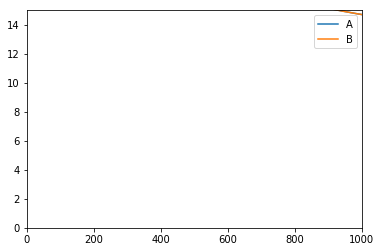

In [324]:
##
##  Datos originales
##
X0 = count_vect.transform(spam_d)
X1 = count_vect.transform(ham_d)

X0 = X0.toarray()
X1 = X1.toarray()

Y = [0] * len(X0) + [1] * len(X1)
X = np.concatenate((X0, X1))
X = X.tolist()


##
##  Solución
##  Se codifica un vector para cada clase
##
A = [+1 if u == 0 else 0 for u in Y] # spam
B = [+1 if u == 1 else 0 for u in Y] # ham


##
## Modelos
##
max_iter = 1000
mA = Perceptron(learning_rate=0.001, max_iter=max_iter)
mB = Perceptron(learning_rate=0.001, max_iter=max_iter)


historyA = mA.fitBatchDescGrad(X, A)
historyB = mB.fitBatchDescGrad(X, B)



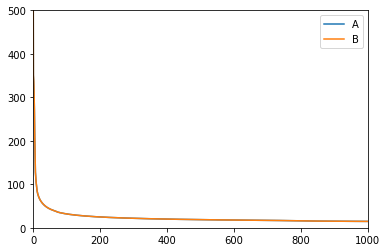

In [327]:

plt.plot(historyA)
plt.plot(historyB)
plt.legend(['A', 'B']);
plt.xlim(0, max_iter)
plt.ylim(0, 500);

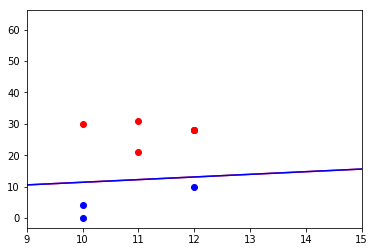

In [333]:
iterXY = [(X[i], Y[i]) for i in range(len(X))]
Ax = [e[0]  for (e, y) in iterXY if y == 0]
Ay = [e[1]  for (e, y) in iterXY if y == 0]

Bx = [e[0]  for (e, y) in iterXY if y == 1]
By = [e[1]  for (e, y) in iterXY if y == 1]


plt.plot(Ax, Ay, 'ro')
plt.plot(Bx, By, 'bo')
plt.xlim(9, 15)
#plt.ylim(5, 18)

xplot = np.linspace(start=9, stop=15, num=20)
fronteraA = - mA.w[0] / mA.w[2] - mA.w[1] / mA.w[2] * xplot
fronteraB = - mB.w[0] / mB.w[2] - mB.w[1] / mB.w[2] * xplot

plt.plot(xplot, fronteraA, color='red')
plt.plot(xplot, fronteraB, color='blue')

In [375]:
def per_predict(X):
    pa = mA.predict(X)
    pb = mB.predict(X)
    results = [(pa[i], pb[i]) for i in range(len(X))]
    return [0 if a > b else 1 for (a,b) in results]

In [376]:
#X1 = count_vect.transform(ham_t)
X1 = count_vect.transform(spam_t)
X = X1.toarray()  
D = [0] * len(X)
pred = per_predict(X.tolist())
error = np.sqrt(np.sum(D - np.array(pred))**2) / len(D)
error

0.10797101449275362

In [451]:
vald = [(D[i], pred[i]) for i in range(len(D))]

tp = 0
tn = 0
fn = 0
fp = 0

for (d,y) in vald:
    if d == 0:
        if y == 0:
            tp += 1
        if y == 1:
            fn += 1
    if d == 1:
        if y == 1:
            tn += 1
        if y == 0:
            fp += 1

print("---------------")
print("True Positives = " + str(tp))
print("True Negatives = " + str(tn))
print("False Positives = " + str(fp))
print("False Negatives = " + str(fn))
print("Success Rate = " + str((tp + tn)/(tp + tn + fp +fn)))
print("Error rate = " + str((fp + fn)/(tp + tn + fp +fn)))
print("Precision = " + str(tp/(tp+fp)))
print("Negative predicted value = " + str(tn/(tn+fn)))
print("Sensitivity = " + str(tp/(tp+fn)))
print("Specifity = " + str(tn/(tn+fp)))

---------------
True Positives = 360
True Negatives = 769
False Positives = 11
False Negatives = 14
Success Rate = 0.9783362218370883
Error rate = 0.021663778162911613
Precision = 0.9703504043126685
Negative predicted value = 0.9821200510855683
Sensitivity = 0.9625668449197861
Specifity = 0.985897435897436


In [416]:
spam_d = [''.join(e) for e in bags["spam"]] + [''.join(e) for e in bags["spam_2"]] 
ham_d = [''.join(e) for e in bags["easy_ham"]] + [''.join(e) for e in bags["easy_ham_2"]]
spam_d = np.array(spam_d)
ham_d = np.array(ham_d)

In [418]:
type(spam_d)

numpy.ndarray

In [431]:
from sklearn.model_selection import KFold
    #added some parameters
n_splits = 5
kf = KFold(n_splits = n_splits, shuffle = True, random_state = 2)
    
kf.get_n_splits(spam_d)

spam_train = []
spam_test = []

for train_index, test_index in kf.split(spam_d):
    #print("TRAIN:", train_index, "TEST:", test_index)
    spam_d_train, spam_d_test = spam_d[train_index], spam_d[test_index]
    spam_train.append(spam_d_train)
    spam_test.append(spam_d_test)

    
kf.get_n_splits(ham_d)

ham_train = []
ham_test = []

for train_index, test_index in kf.split(ham_d):
    ham_d_train, ham_d_test = ham_d[train_index], ham_d[test_index]
    ham_train.append(ham_d_train)
    ham_test.append(ham_d_test)

5

In [433]:
errors = []
for i in range (n_splits):
    ##
    ##  Datos originales
    ##
    X0 = count_vect.transform(spam_train[i].tolist())
    X1 = count_vect.transform(ham_train[i].tolist())

    X0 = X0.toarray()
    X1 = X1.toarray()

    Y = [0] * len(X0) + [1] * len(X1)
    X = np.concatenate((X0, X1))
    X = X.tolist()


    ##
    ##  Solución
    ##  Se codifica un vector para cada clase
    ##
    A = [+1 if u == 0 else 0 for u in Y] # spam
    B = [+1 if u == 1 else 0 for u in Y] # ham


    ##
    ## Modelos
    ##
    max_iter = 250
    mA = Perceptron(learning_rate=0.001, max_iter=max_iter)
    mB = Perceptron(learning_rate=0.001, max_iter=max_iter)


    historyA = mA.fitBatchDescGrad(X, A)
    historyB = mB.fitBatchDescGrad(X, B)

    Xp0 = count_vect.transform(spam_test[i].tolist())
    Xp1 = count_vect.transform(ham_test[i].tolist())
    
    Xp0 = Xp0.toarray()  
    Xp1 = Xp1.toarray()
    
    D = [0] * len(Xp0) + [1] * len(Xp1)
    Xp = np.concatenate((Xp0, Xp1))
    pred = per_predict(Xp.tolist())
    error = np.sqrt(np.sum(D - np.array(pred))**2) / len(D)
    errors.append(error)

In [438]:
print("Kfold crossvalidation men error is " + str(sum(errors)/len(errors)))


Kfold crossvalidation men error is 0.002598302910261316
